In [41]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [42]:
data=pd.read_csv("data_for_coll.csv")

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [44]:
data = data.drop('Id', axis=1)

In [45]:
print("\nПропущенные значения в каждом столбце:")
print(data.isnull().sum())


Пропущенные значения в каждом столбце:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [46]:
print("Ключи digits_dataset: \n{}".format(data.keys()))

Ключи digits_dataset: 
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [47]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Фильтруем аномалии
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Выводим информацию о выбросах
    print(f"Колонка: {column}, Количество выбросов и аномалий: {len(outliers)}")
    
    # Удаляем аномалии из исходного DataFrame
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df, outliers

# Применяем функцию к каждому столбцу
for column in data.columns[1:]:
    data, outliers = remove_outliers(data, column)

Колонка: volatile acidity, Количество выбросов и аномалий: 14
Колонка: citric acid, Количество выбросов и аномалий: 1
Колонка: residual sugar, Количество выбросов и аномалий: 109
Колонка: chlorides, Количество выбросов и аномалий: 74
Колонка: free sulfur dioxide, Количество выбросов и аномалий: 17
Колонка: total sulfur dioxide, Количество выбросов и аномалий: 39
Колонка: density, Количество выбросов и аномалий: 17
Колонка: pH, Количество выбросов и аномалий: 18
Колонка: sulphates, Количество выбросов и аномалий: 28
Колонка: alcohol, Количество выбросов и аномалий: 5
Колонка: quality, Количество выбросов и аномалий: 13


In [48]:
print("Информация о dataframe после удаления выбросов и аномалий")    
data.info()

Информация о dataframe после удаления выбросов и аномалий
<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         808 non-null    float64
 1   volatile acidity      808 non-null    float64
 2   citric acid           808 non-null    float64
 3   residual sugar        808 non-null    float64
 4   chlorides             808 non-null    float64
 5   free sulfur dioxide   808 non-null    float64
 6   total sulfur dioxide  808 non-null    float64
 7   density               808 non-null    float64
 8   pH                    808 non-null    float64
 9   sulphates             808 non-null    float64
 10  alcohol               808 non-null    float64
 11  quality               808 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 82.1 KB


In [49]:
def remove_duplicates(df):
    df = df.drop_duplicates()
    return df

data = remove_duplicates(data)

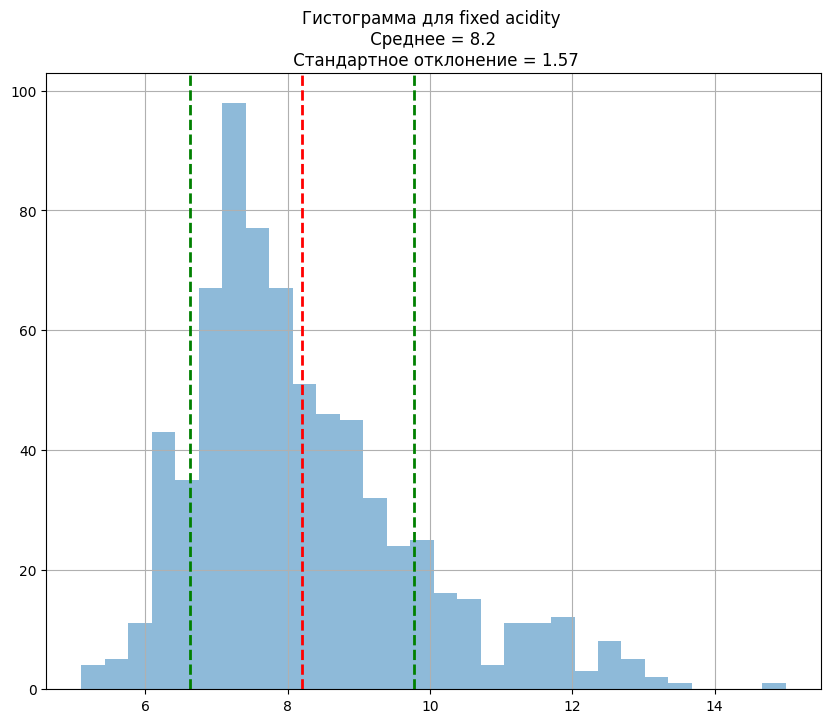

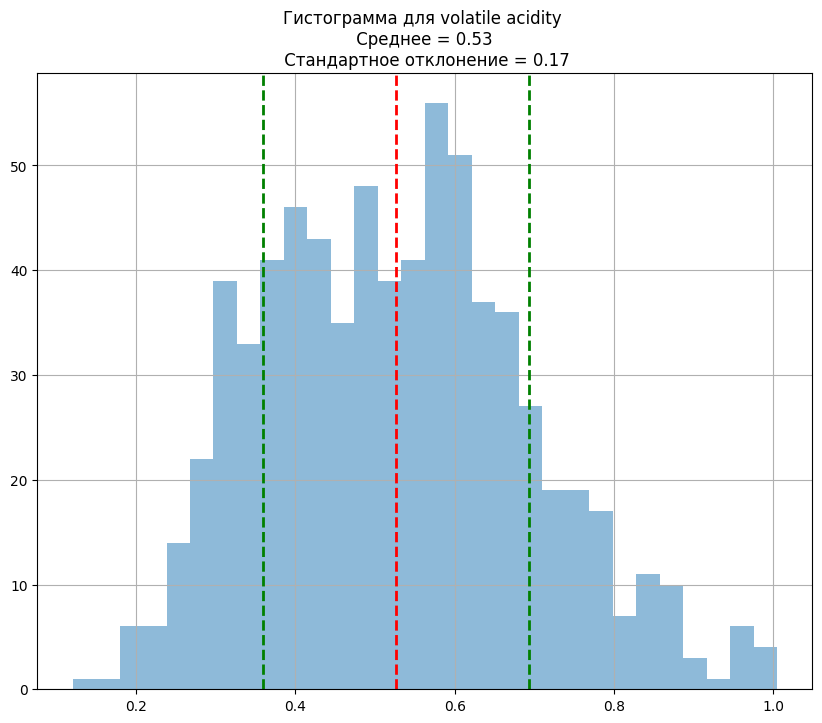

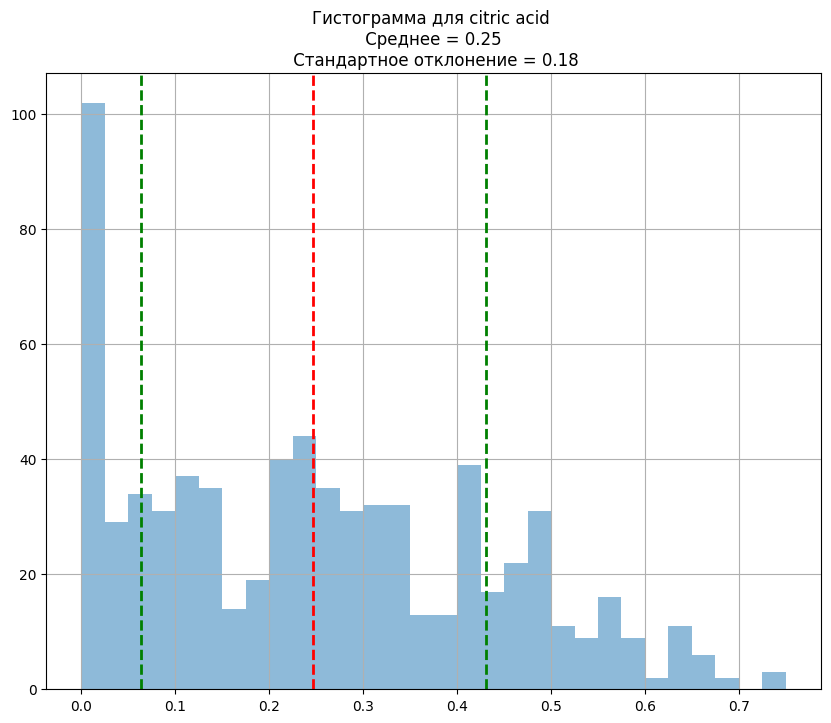

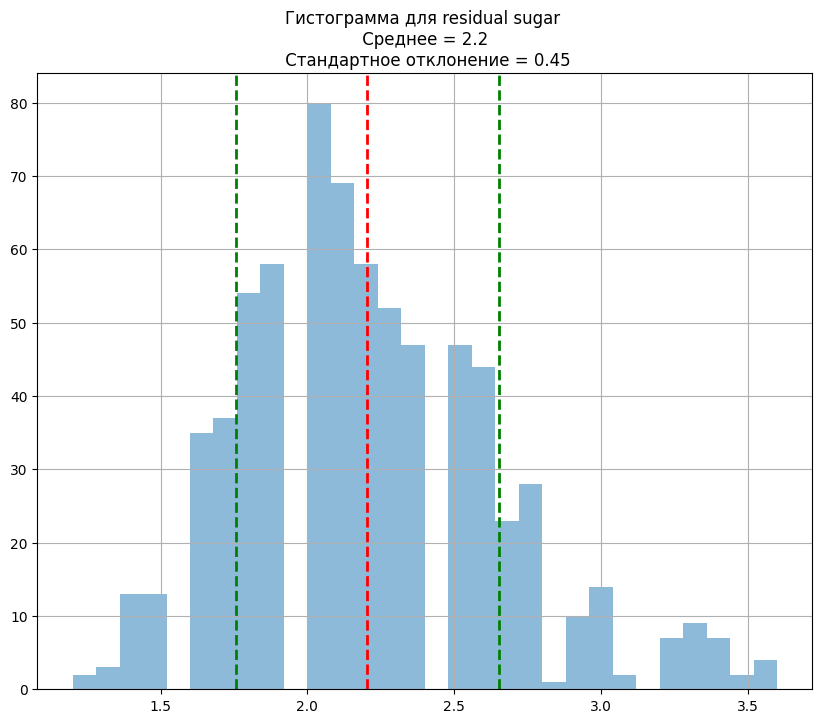

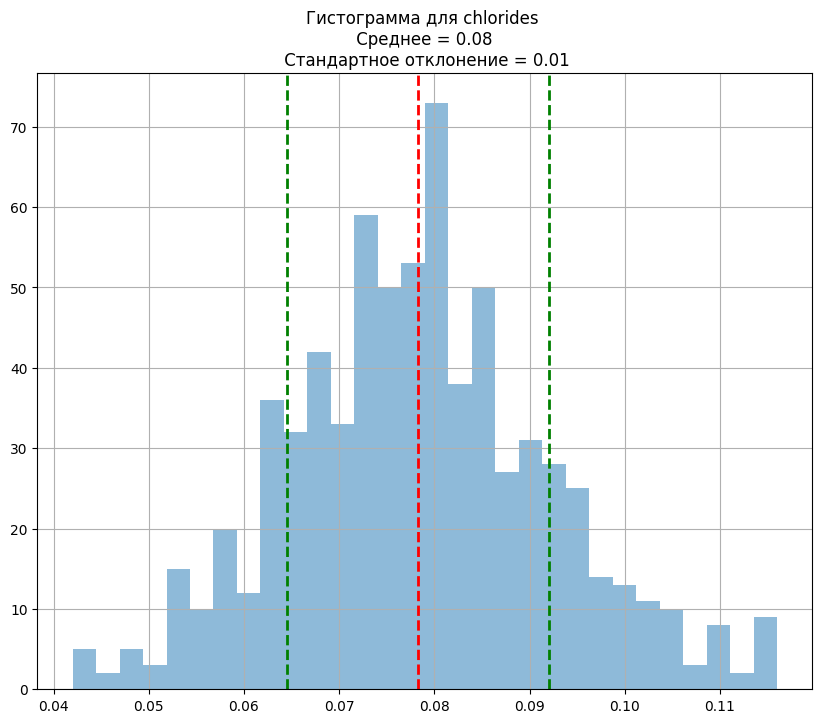

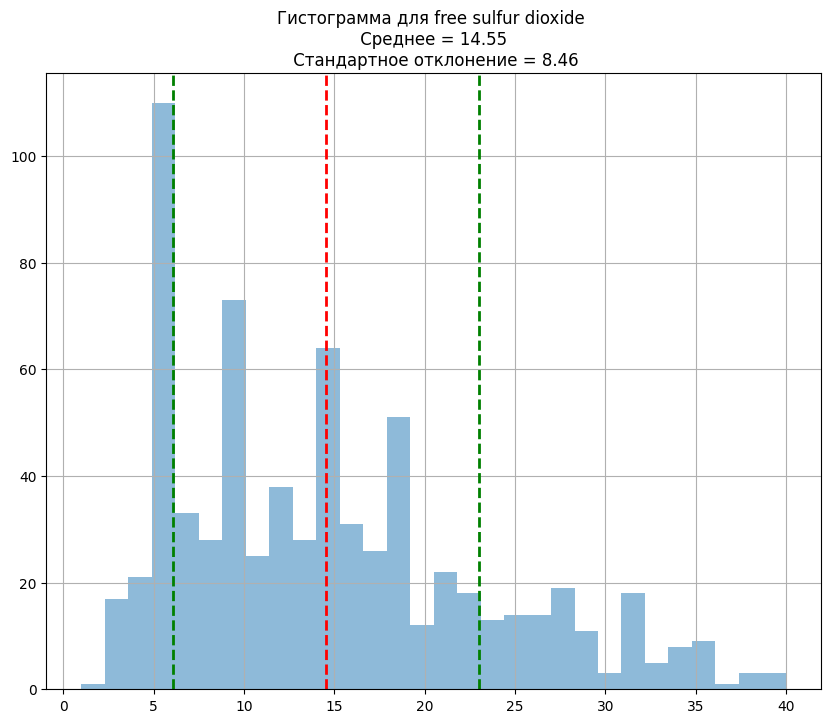

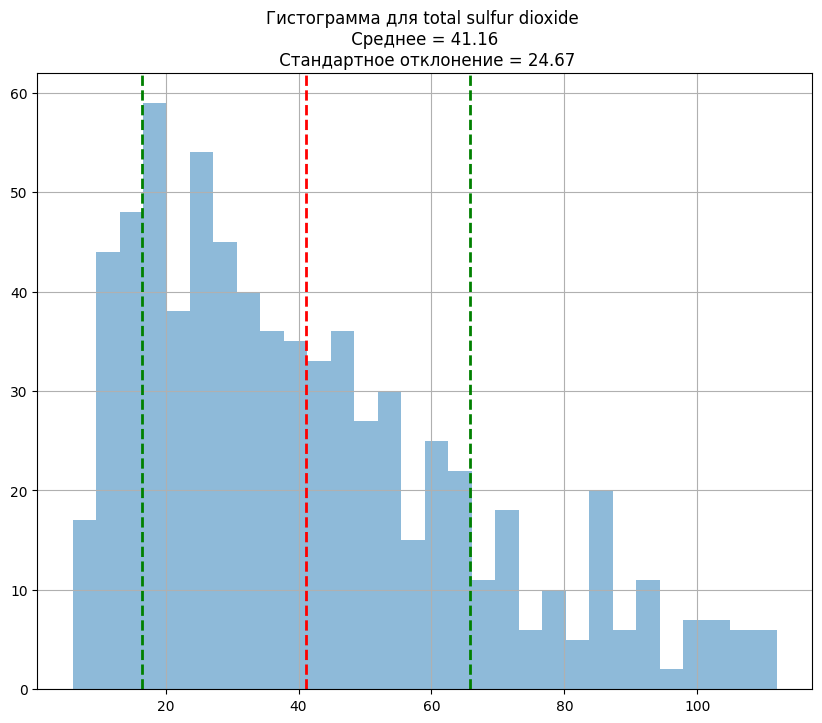

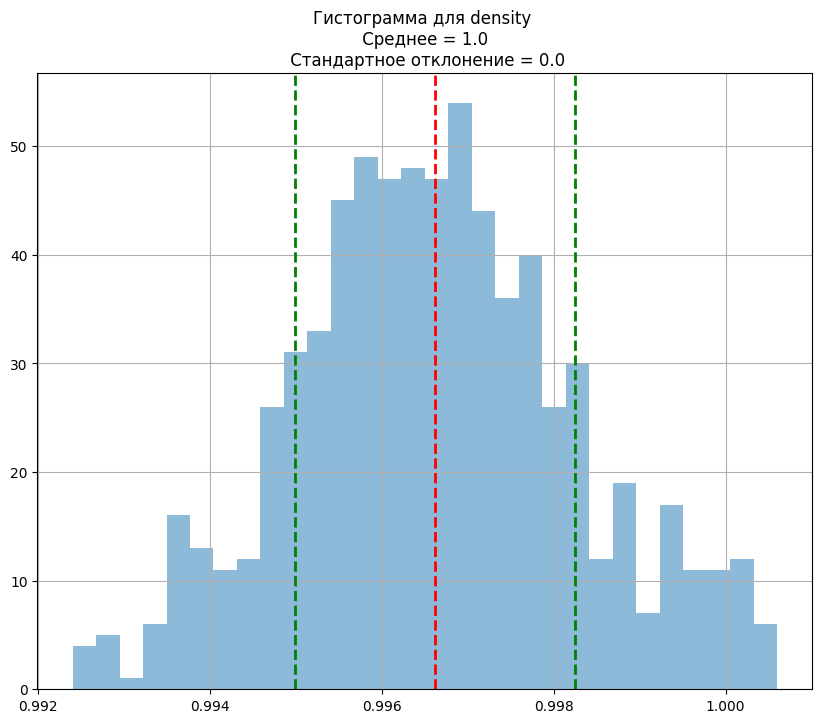

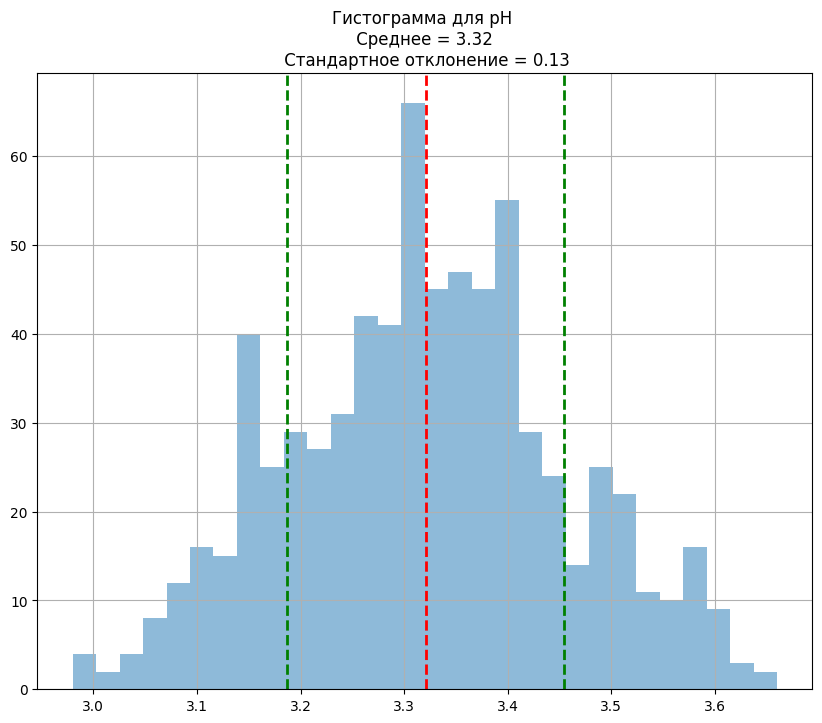

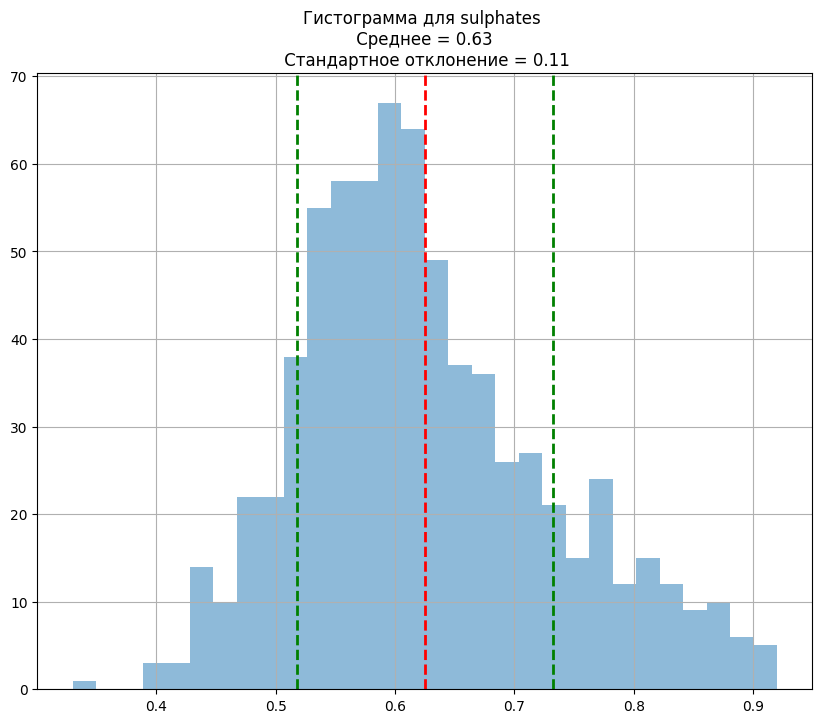

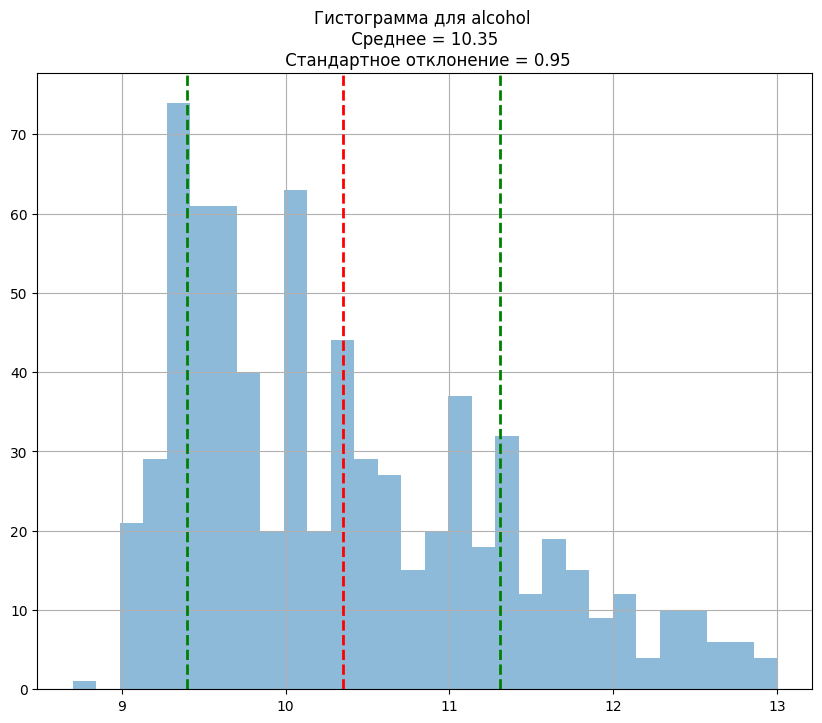

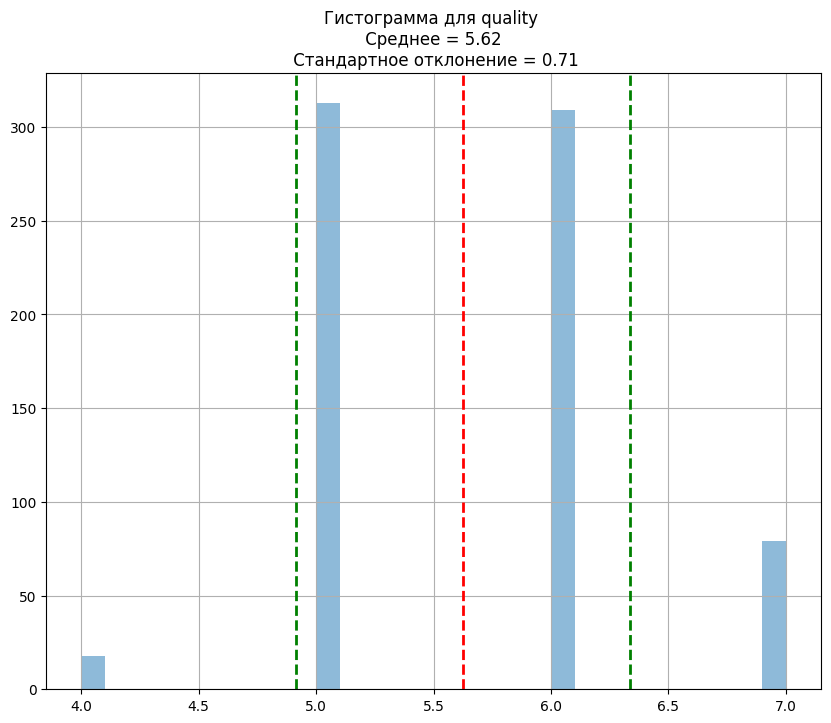

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Предполагается, что 'data_for_corellation' - это ваш DataFrame
for column in data.columns:
    plt.figure(figsize=(10, 8))
    
    # Расчет среднего значения и стандартного отклонения
    mean = data[column].mean()
    std = data[column].std()
    
    # Создание гистограммы
    data[column].hist(bins=30, alpha=0.5)
    
    # Добавление линии среднего значения
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    
    # Добавление линий стандартного отклонения
    plt.axvline(mean - std, color='g', linestyle='dashed', linewidth=2)
    plt.axvline(mean + std, color='g', linestyle='dashed', linewidth=2)
    
    plt.title(f'Гистограмма для {column} \n Среднее = {np.round(mean, 2)} \n Стандартное отклонение = {np.round(std, 2)}')
    plt.show()


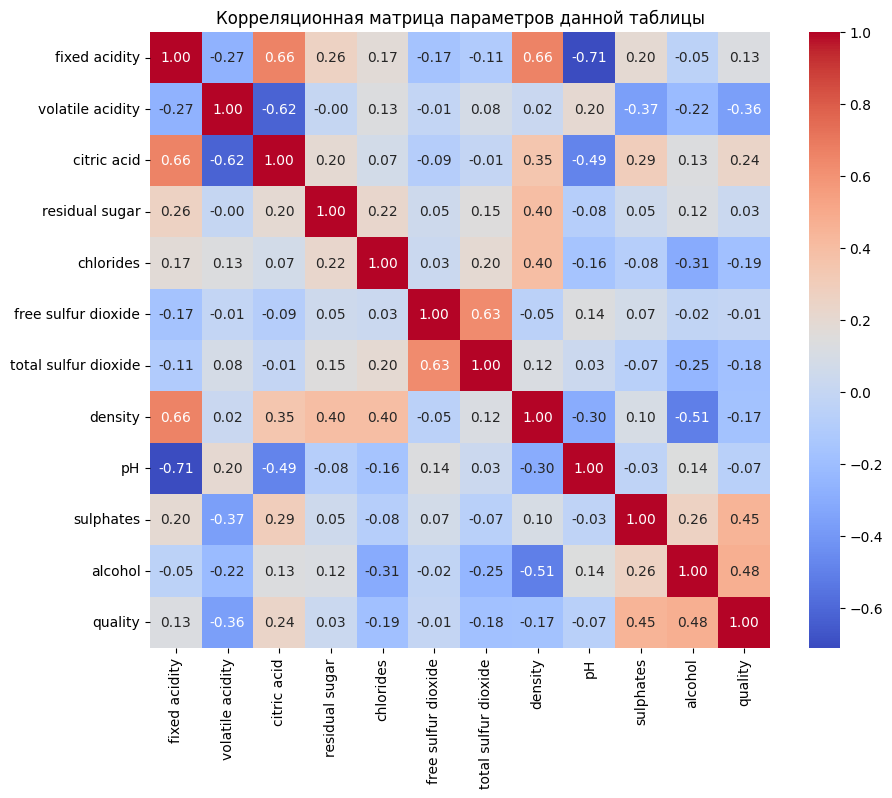

In [51]:
correlation_matrix = data.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица параметров данной таблицы')
plt.show()